# Notebook 3: CPUs-GPUs

El entrenamiento de redes es un proceso muy costoso, debido a que tiene que procesar mucha información. En este notebook vamos a realizar una comparación de los entrenamientos de varias redes en distintos entornos, unos contarán solo con su CPU, mientras que otros podrán hacer uso de gráficas y por lo tanto de su correspondiente GPU.

## Pasos previos
Este primero notebook se realiza sobre un ordenador portátil sin gráfica, pero para ver mejor sus características empezaremos mostrando la información del entorno en el que vamos a trabajar.

In [0]:
!apt-get  install lshw
!lshw

E: No se pudo abrir el fichero de bloqueo «/var/lib/dpkg/lock» - open (13: Permiso denegado)
E: No se pudo bloquear el directorio de administración (/var/lib/dpkg/), ¿está como superusuario?
AVISO: debería ejecutar este programa como superusuario.
alumno                    
    descripción: Computer
    anchura: 64 bits
    capacidades: vsyscall32
  *-core
       descripción: Motherboard
       id físico: 0
     *-memory
          descripción: Memoria de sistema
          id físico: 0
          tamaño: 3951MiB
     *-cpu
          producto: Intel(R) Core(TM) i5-4288U CPU @ 2.60GHz
          fabricante: Intel Corp.
          id físico: 1
          información del bus: cpu@0
          anchura: 64 bits
          capacidades: fpu fpu_exception wp vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 syscall nx rdtscp x86-64 constant_tsc rep_good nopl xtopology nonstop_tsc pni pclmulqdq monitor ssse3 cx16 sse4_1 sse4_2 movbe popcnt aes xsave avx rdran

De todas sus características la que más nos interesa para este trabajo es la información relativa a la GPU, donde podemos destacar:
* Es un Intel(R) Core(TM) i5-4288U CPU @ 2.60GHz.
* Tiene un procesador con un core.
* Anchura: 64 bits.

## Descarga de librerías

El siguiente paso será descargar las librerías necesarias. Para ello descargamos el zip correspondiente y lo descomprimimos.

In [0]:
!wget www.unirioja.es/cu/joheras/redes.zip
!unzip redes.zip

--2018-05-04 23:56:57--  http://www.unirioja.es/cu/joheras/redes.zip
Resolviendo www.unirioja.es (www.unirioja.es)... 193.144.2.30
Conectando con www.unirioja.es (www.unirioja.es)[193.144.2.30]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 5145 (5,0K) [application/zip]
Grabando a: “redes.zip.7”

redes.zip.7         100%[===================>]   5,02K  --.-KB/s    in 0,06s   

2018-05-04 23:56:58 (80,7 KB/s) - “redes.zip.7” guardado [5145/5145]

Archive:  redes.zip
replace redes/lenet.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


Importas los paquetes necesarios, en este caso con las que más vamos a trabajar son:
* En primer lugar importamos las redes con las que vamos a trabajar que son: *LeNet*, *GoogleNet*, *VGGNet*, *ResNet*, *ShallowNet*.
* Keras es una biblioteca de aprendizaje profundo que utiliza por debajo TensorFlow y que nos permitirá trabajar con las redes.
* Sklearn clase de la que heredan todos los algortimos
* Numpy es una extensión de Python, que le permite realizar operaciones con vectores y matrices.
* Matpltolib es una biblioteca para la generación de gráficos a partir de datos.

In [0]:
from redes import *
from keras.optimizers import RMSprop
from keras.optimizers import SGD
from IPython.display import Image
from keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.datasets import cifar10
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/home/alumno/.virtualenvs/tfm/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Para entrenar estas redes vamos a trabajar con un dataset ya creado, es el [Cifar-10](https://www.cs.toronto.edu/~kriz/cifar.html), que consta de 60000 imágenes dividido en 10 clases. El dataset se divide en cinco conjuntos de entrenamiento y uno de test, cada uno con 10000 imágenes.

In [0]:
print("[INFO] loading CIFAR-10 data...")
((trainX, trainY), (testX, testY)) = cifar10.load_data()
trainX = trainX.astype("float")
testX = testX.astype("float")

[INFO] loading CIFAR-10 data...


El siguiente paso consistirá en preprocesar los datos, es decir, calcularemos la media del dataset de entrenamiento y de test.

In [0]:
mean = np.mean(trainX, axis=0)
trainX -= mean
testX -= mean


Aplicamos las transformaciones correspondientes al conjunto de entrenamiento convirtiendo las etiquestas para procesarlas y luego aplicamos la misma transformación al conjunto de test.

In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

Una vez que ya tenemos todo preaparado empezamos a trabajar con los redes.

# LeNet

La arquitectura LeNet es sencilla y pequeña, por lo que es perfecta para enseñar los conceptos básicos de CNN. Se usa principalmente para OCR y reconocimiento de caracteres en documentos.

Definimos la red

In [0]:
model = LeNet.build(width=32, height=32, depth=3, classes=10)

Mostrar arquitectura de la red.

E: No se pudo abrir el fichero de bloqueo «/var/lib/dpkg/lock» - open (13: Permiso denegado)
E: No se pudo bloquear el directorio de administración (/var/lib/dpkg/), ¿está como superusuario?
  Using cached https://files.pythonhosted.org/packages/6a/8a/718fd7d3458f9fab8e67186b00abdd345b639976bc7fb3ae722e1b026a50/pyparsing-2.2.0-py2.py3-none-any.whl
  Found existing installation: pyparsing 2.2.0
    Uninstalling pyparsing-2.2.0:
      Successfully uninstalled pyparsing-2.2.0
  Found existing installation: pydot 1.2.4
    Uninstalling pydot-1.2.4:
      Successfully uninstalled pydot-1.2.4


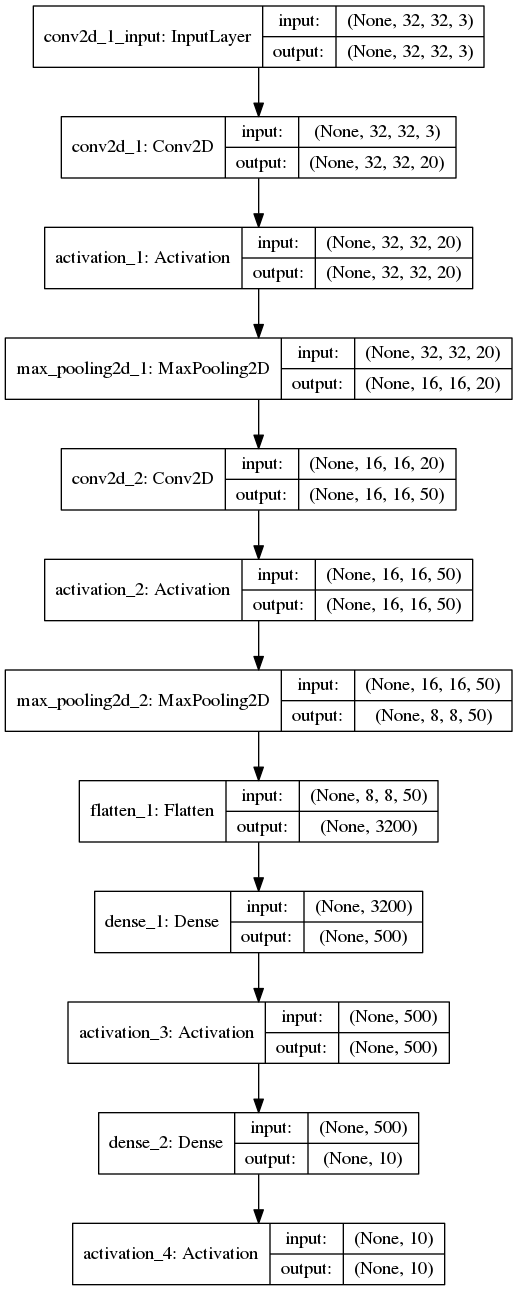

In [0]:
!apt-get install graphviz
!pip install graphviz pydotplus
!pip install --upgrade --force-reinstall pydot
plot_model(model, to_file="lenet.png", show_shapes=True)
Image("lenet.png")

Compilar la red.

In [0]:
opt = SGD(lr=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

Entrenamos la red. 

In [0]:
%%time
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=128, epochs=1, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 277s 6ms/step - loss: 14.5029 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
CPU times: user 3min 42s, sys: 23.7 s, total: 4min 5s
Wall time: 4min 37s


Evaluar la red en el conjunto de test, y mostrar el tiempo. 

In [0]:
%%time
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1)))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1000
          1       0.00      0.00      0.00      1000
          2       0.10      1.00      0.18      1000
          3       0.00      0.00      0.00      1000
          4       0.00      0.00      0.00      1000
          5       0.00      0.00      0.00      1000
          6       0.00      0.00      0.00      1000
          7       0.00      0.00      0.00      1000
          8       0.00      0.00      0.00      1000
          9       0.00      0.00      0.00      1000

avg / total       0.01      0.10      0.02     10000

CPU times: user 16.5 s, sys: 932 ms, total: 17.5 s
Wall time: 18.5 s


/home/alumno/.virtualenvs/tfm/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# GoogleNet

Definimos la red

In [0]:
model = GoogLeNet.build(width=32, height=32, depth=3, classes=10)

E: No se pudo abrir el fichero de bloqueo «/var/lib/dpkg/lock» - open (13: Permiso denegado)
E: No se pudo bloquear el directorio de administración (/var/lib/dpkg/), ¿está como superusuario?
  Using cached https://files.pythonhosted.org/packages/6a/8a/718fd7d3458f9fab8e67186b00abdd345b639976bc7fb3ae722e1b026a50/pyparsing-2.2.0-py2.py3-none-any.whl
  Found existing installation: pyparsing 2.2.0
    Uninstalling pyparsing-2.2.0:
      Successfully uninstalled pyparsing-2.2.0
  Found existing installation: pydot 1.2.4
    Uninstalling pydot-1.2.4:
      Successfully uninstalled pydot-1.2.4


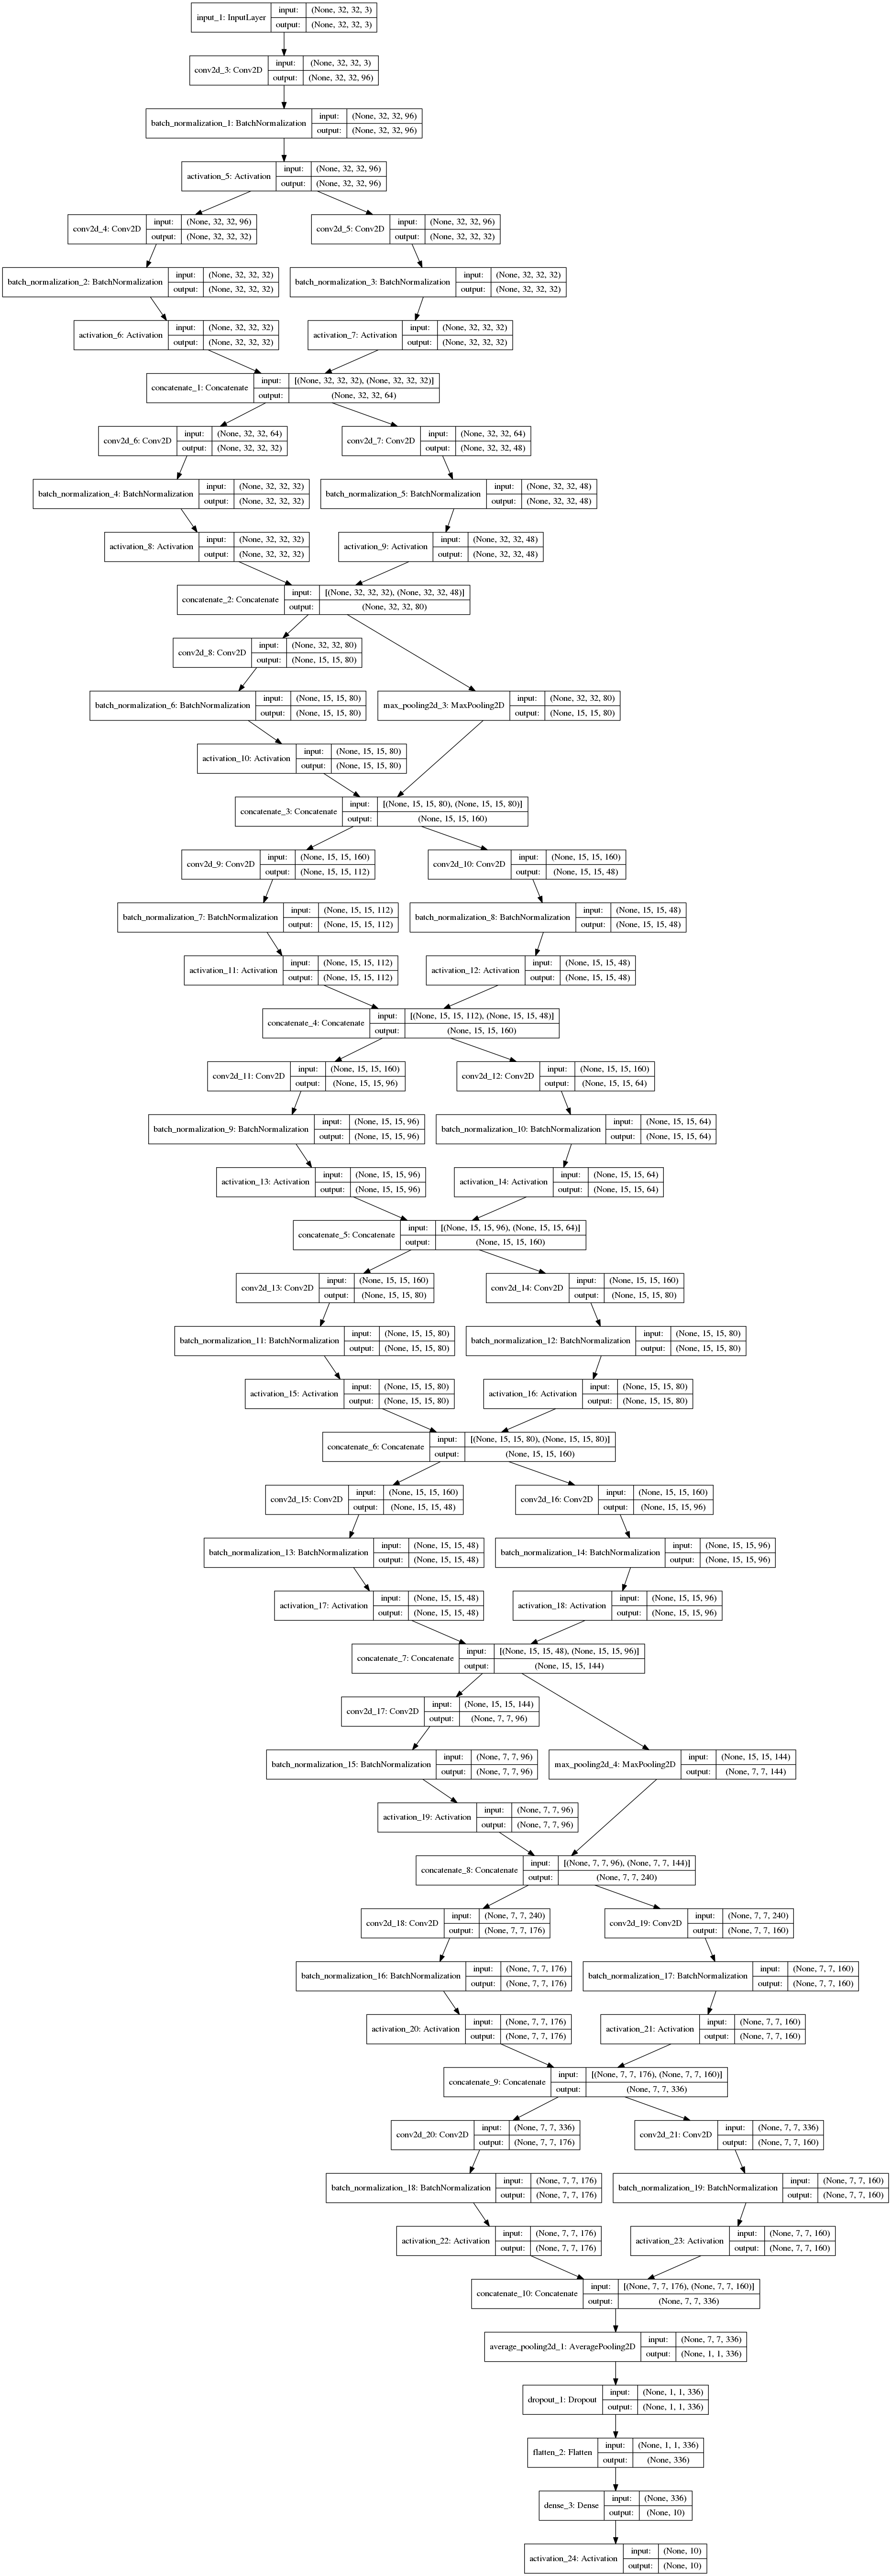

In [0]:
!apt-get install graphviz
!pip install graphviz pydotplus
!pip install --upgrade --force-reinstall pydot
plot_model(model, to_file="googlenet.png", show_shapes=True)
Image("googlenet.png")

Compilamos la red.

In [0]:
model.compile(loss="categorical_crossentropy", optimizer=RMSprop())


Entrenamos la red.

In [0]:
%%time
H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=128, epochs=1, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 6873s 137ms/step - loss: 1.6446 - val_loss: 3.1127
CPU times: user 1h 37min 5s, sys: 6min 58s, total: 1h 44min 3s
Wall time: 1h 54min 36s


Evaluar la red en el conjunto de test, y mostramos el tiempo que le ha costado.

In [0]:
%%time
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1)))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.56      0.31      0.40      1000
          1       0.23      0.95      0.37      1000
          2       0.56      0.02      0.04      1000
          3       0.32      0.17      0.22      1000
          4       0.46      0.19      0.27      1000
          5       0.51      0.28      0.36      1000
          6       0.69      0.15      0.25      1000
          7       0.34      0.53      0.41      1000
          8       0.54      0.71      0.61      1000
          9       0.33      0.22      0.26      1000

avg / total       0.45      0.35      0.32     10000

CPU times: user 6min 13s, sys: 22.5 s, total: 6min 36s
Wall time: 7min 16s


# VGGNet

Definimos la red

In [0]:
model = VGGNet.build(width=32, height=32, depth=3, classes=10)

In [0]:
!apt-get install graphviz
!pip install graphviz pydotplus
!pip install --upgrade --force-reinstall pydot
plot_model(model, to_file="vggnet.png", show_shapes=True)
Image("vggnet.png")

E: No se pudo abrir el fichero de bloqueo «/var/lib/dpkg/lock» - open (13: Permiso denegado)
E: No se pudo bloquear el directorio de administración (/var/lib/dpkg/), ¿está como superusuario?
  Using cached https://files.pythonhosted.org/packages/6a/8a/718fd7d3458f9fab8e67186b00abdd345b639976bc7fb3ae722e1b026a50/pyparsing-2.2.0-py2.py3-none-any.whl
  Found existing installation: pyparsing 2.2.0
    Uninstalling pyparsing-2.2.0:
      Successfully uninstalled pyparsing-2.2.0
  Found existing installation: pydot 1.2.4
    Uninstalling pydot-1.2.4:
      Successfully uninstalled pydot-1.2.4


Compilamos la red.

In [0]:
opt = SGD(lr=0.01, decay=0.01 / 40, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy" , optimizer=opt, metrics=["accuracy" ])

Entrenamos la red. 

In [0]:
%%time
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=64, epochs=1, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 1201s 24ms/step - loss: 1.6249 - acc: 0.4539 - val_loss: 1.1095 - val_acc: 0.6086
CPU times: user 16min 27s, sys: 1min 19s, total: 17min 47s
Wall time: 20min 1s


Evaluar la red en el conjunto de test, y mostramos el tiempo que le ha costado. 

In [0]:
%%time
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1)))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.58      0.69      0.63      1000
          1       0.77      0.69      0.73      1000
          2       0.53      0.40      0.45      1000
          3       0.42      0.44      0.43      1000
          4       0.48      0.64      0.55      1000
          5       0.59      0.41      0.48      1000
          6       0.70      0.71      0.70      1000
          7       0.64      0.68      0.66      1000
          8       0.70      0.78      0.74      1000
          9       0.73      0.65      0.69      1000

avg / total       0.61      0.61      0.61     10000

CPU times: user 1min 4s, sys: 1.25 s, total: 1min 6s
Wall time: 1min 12s


# ResNet

Definimos la red

In [0]:
model = ResNet.build(width=32, height=32, depth=3, classes=10)

In [0]:
!apt-get install graphviz
!pip install graphviz pydotplus
!pip install --upgrade --force-reinstall pydot
plot_model(model, to_file="resnet.png", show_shapes=True)
Image("resnet.png")

E: No se pudo abrir el fichero de bloqueo «/var/lib/dpkg/lock» - open (13: Permiso denegado)
E: No se pudo bloquear el directorio de administración (/var/lib/dpkg/), ¿está como superusuario?
  Using cached https://files.pythonhosted.org/packages/6a/8a/718fd7d3458f9fab8e67186b00abdd345b639976bc7fb3ae722e1b026a50/pyparsing-2.2.0-py2.py3-none-any.whl
  Found existing installation: pyparsing 2.2.0
    Uninstalling pyparsing-2.2.0:
      Successfully uninstalled pyparsing-2.2.0
  Found existing installation: pydot 1.2.4
    Uninstalling pydot-1.2.4:
      Successfully uninstalled pydot-1.2.4


Compilamos la red

In [0]:
opt = SGD(lr=0.005)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [0]:
%%time
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=128, epochs=1, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 14460s 289ms/step - loss: 2.6283 - acc: 0.1972 - val_loss: 2.4652 - val_acc: 0.2602
CPU times: user 3h 15min 38s, sys: 20min 40s, total: 3h 36min 19s
Wall time: 4h 1min 9s


Evaluar la red en el conjunto de test, y mostramos el tiempo que le ha costado.

In [0]:
%%time
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1)))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.37      0.40      0.38      1000
          1       0.30      0.40      0.34      1000
          2       0.13      0.08      0.10      1000
          3       0.19      0.14      0.16      1000
          4       0.25      0.66      0.36      1000
          5       0.22      0.09      0.13      1000
          6       0.26      0.18      0.21      1000
          7       0.23      0.05      0.08      1000
          8       0.29      0.28      0.28      1000
          9       0.26      0.34      0.29      1000

avg / total       0.25      0.26      0.23     10000

CPU times: user 14min 34s, sys: 36.1 s, total: 15min 10s
Wall time: 16min 50s


# ShallowNet

Definimos la red

In [0]:
model = ShallowNet.build(width=32, height=32, depth=3, classes=10)

E: No se pudo abrir el fichero de bloqueo «/var/lib/dpkg/lock» - open (13: Permiso denegado)
E: No se pudo bloquear el directorio de administración (/var/lib/dpkg/), ¿está como superusuario?
  Using cached https://files.pythonhosted.org/packages/6a/8a/718fd7d3458f9fab8e67186b00abdd345b639976bc7fb3ae722e1b026a50/pyparsing-2.2.0-py2.py3-none-any.whl
  Found existing installation: pyparsing 2.2.0
    Uninstalling pyparsing-2.2.0:
      Successfully uninstalled pyparsing-2.2.0
  Found existing installation: pydot 1.2.4
    Uninstalling pydot-1.2.4:
      Successfully uninstalled pydot-1.2.4


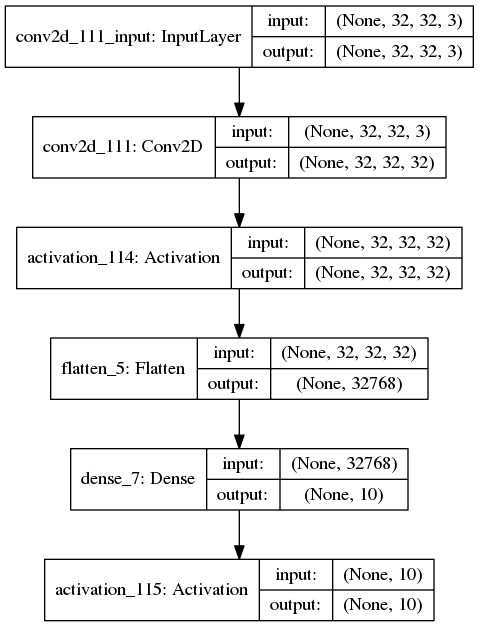

In [0]:
!apt-get install graphviz
!pip install graphviz pydotplus
!pip install --upgrade --force-reinstall pydot
plot_model(model, to_file="shallownet.png", show_shapes=True)
Image("shallownet.png")

Compilamos la red.

In [0]:
opt = SGD(lr=0.005)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

Entrenamos la red

In [0]:
%%time
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),batch_size=128, epochs=1, verbose=1)

[INFO] training network...
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 131s 3ms/step - loss: 14.2378 - acc: 0.1163 - val_loss: 14.4547 - val_acc: 0.1032
CPU times: user 1min 12s, sys: 6.61 s, total: 1min 18s
Wall time: 2min 11s


Evaluar la red en el conjunto de test, y mostramos el tiempo que le ha costado. 

In [0]:
%%time
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1)))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1000
          1       0.00      0.00      0.00      1000
          2       0.00      0.00      0.00      1000
          3       0.00      0.00      0.00      1000
          4       0.10      1.00      0.18      1000
          5       0.00      0.00      0.00      1000
          6       0.00      0.00      0.00      1000
          7       0.00      0.00      0.00      1000
          8       0.36      0.04      0.06      1000
          9       0.00      0.00      0.00      1000

avg / total       0.05      0.10      0.02     10000

CPU times: user 6.06 s, sys: 404 ms, total: 6.47 s
Wall time: 8.21 s


/home/alumno/.virtualenvs/tfm/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
